In [1]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

## **TASK 1 Apply Hadamard gates to both qubits**

Each qubit is placed into an equal superposition of |0⟩ and |1⟩.
Together, they form a uniform four-state system: |00⟩, |01⟩, |10⟩, |11⟩.
The histogram shows roughly equal bars for all outcomes each has a probability close to 25%.

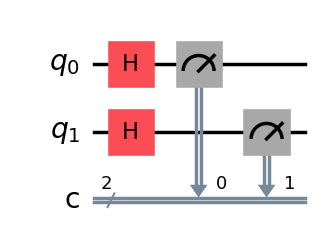

Measurement Results: {'01': 258, '11': 255, '00': 252, '10': 259}


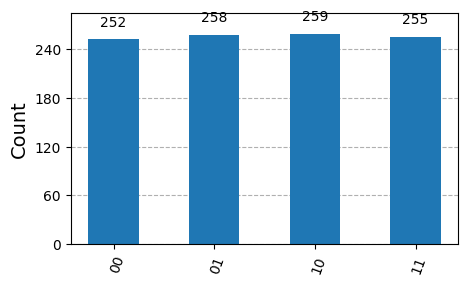

Observation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.


In [3]:
sim = AerSimulator()
qc1 = QuantumCircuit(2, 2)
qc1.h(0)
qc1.h(1)
qc1.measure([0, 1], [0, 1])

compiled = transpile(qc1, sim)
counts = sim.run(compiled, shots=1024).result().get_counts()

# Draw circuit
fig, ax = plt.subplots(figsize=(5,3))
qc1.draw('mpl', ax=ax)
plt.show()

print("Measurement Results:", counts)
# Plot histogram
fig, ax = plt.subplots(figsize=(5,3))
plot_histogram(counts, ax=ax)
plt.show()

print("Observation: Each qubit is in superposition → Equal probabilities for 00, 01, 10, 11.")




## **TASK 2 Swap qubit roles**

The X gate flips the second qubit from |0⟩ to |1⟩ while the first qubit remains |0⟩.
Thus, the system deterministically collapses to |01⟩.
The histogram shows a single bar, confirming a fixed classical state with no superposition.

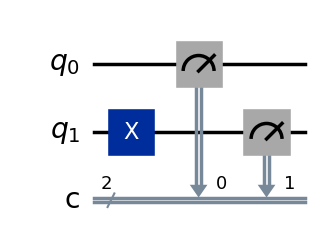

Measurement Results: {'10': 1024}


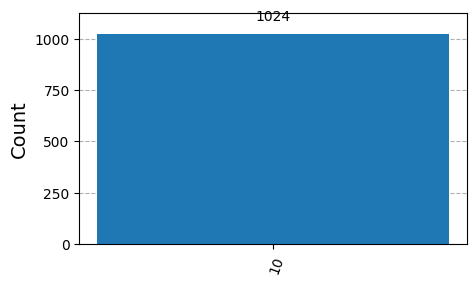

Observation: When we apply an X gate to the second qubit, it flips from |0⟩ to |1⟩.
Hence, the output state is |01⟩ instead of |10⟩ when compared to the original circuit.


In [4]:
# Import required modules
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Step 1: Create the Aer simulator
sim = AerSimulator()

# Step 2: Build the circuit - apply X gate on the SECOND qubit
qc2 = QuantumCircuit(2, 2)
qc2.x(1)                       # Apply X gate on qubit 1 (the second qubit)
qc2.measure([0, 1], [0, 1])    # Measure both qubits

# Step 3: Run the circuit
compiled = transpile(qc2, sim)
result = sim.run(compiled, shots=1024).result()
counts2 = result.get_counts()

# Step 4: Plot the quantum circuit
fig, ax = plt.subplots(figsize=(5, 3))
qc2.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts2)
# Step 5: Plot the measurement results as a histogram
fig, ax = plt.subplots(figsize=(5, 3))
plot_histogram(counts2, ax=ax)
plt.show()
print("Observation: When we apply an X gate to the second qubit, it flips from |0⟩ to |1⟩.")
print("Hence, the output state is |01⟩ instead of |10⟩ when compared to the original circuit.")


## **TASK 3 Add a CNOT gate**

This combination produces a Bell State an entangled state
∣ψ⟩=1/(2^(1/2))(|00⟩+|11⟩)
The measurement results show only 00 and 11, each about 50%.
Measuring one qubit instantly determines the other a hallmark of quantum entanglement.

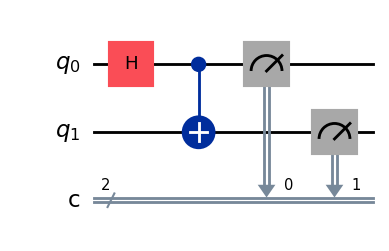

Measurement Results: {'00': 501, '11': 523}


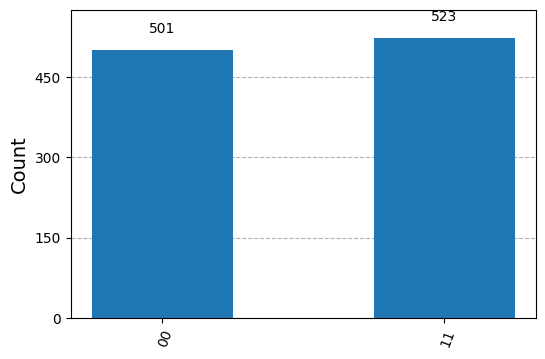

Observation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).


In [5]:
qc3 = QuantumCircuit(2, 2)
qc3.h(0)
qc3.cx(0, 1)
qc3.measure([0, 1], [0, 1])

compiled = transpile(qc3, sim)
counts3 = sim.run(compiled, shots=1024).result().get_counts()

fig, ax = plt.subplots(figsize=(5,3))
qc3.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts3)
fig, ax = plt.subplots(figsize=(6,4))
plot_histogram(counts3, ax=ax)
plt.show()
print("Observation: Bell State formed → Only |00⟩ and |11⟩ appear (entangled).")


## **TASK 4 Increase measurement shots**

By increasing the number of shots, the random fluctuations average out.
The histogram becomes smoother and more symmetrical, showing a more accurate 50/50 distribution.
This demonstrates how larger sample sizes improve the precision of quantum experiments.

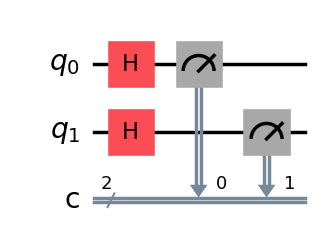

Measurement Results: {'01': 1025, '00': 1052, '10': 959, '11': 1060}


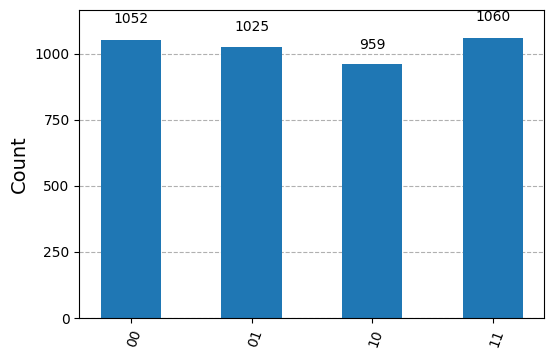

In [6]:
# Step 1: Create Aer simulator
sim = AerSimulator()
# Step 2: Create a 2-qubit circuit with Hadamard gates to create a superposition
qc4 = QuantumCircuit(2, 2)
qc4.h(0)
qc4.h(1)
qc4.measure([0, 1], [0, 1])

# Step 3: Transpile and run the circuit with higher shots (4096)
compiled = transpile(qc4, sim)
result = sim.run(compiled, shots=4096).result()
counts4 = result.get_counts()

# Step 4: Plot the circuit
fig, ax = plt.subplots(figsize=(5, 3))
qc4.draw('mpl', ax=ax)
plt.show()
print("Measurement Results:", counts4)

# Step 5: Plot histogram of the measurement results
fig, ax = plt.subplots(figsize=(6, 4))
plot_histogram(counts4, ax=ax)
plt.show()

## **TASK 5 Visualize the Bloch sphere**

The Bloch multivector shows both qubits in correlated orientations rather than independent points.
This confirms the shared quantum state created by entanglement.
Before measurement, qubits are in a joint superposition; after measurement, the spheres collapse to definite states (|00⟩ or |11⟩).

Quantum Circuit:


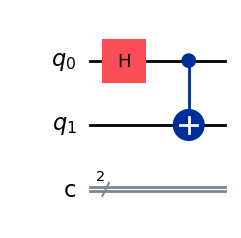

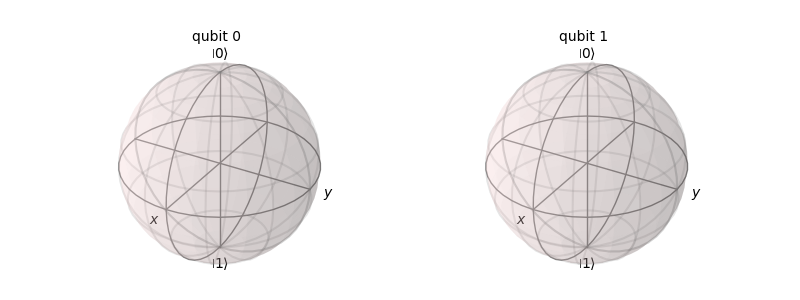

Measurement Results: {'11': 525, '00': 499}


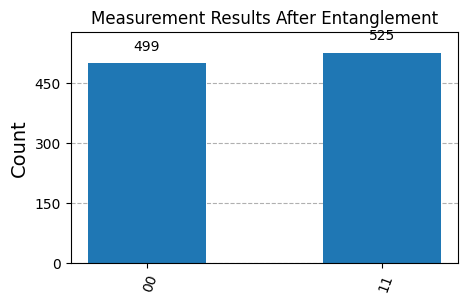

Observation:
Before measurement: Both qubits are entangled, their Bloch vectors are correlated.
After measurement: The entanglement collapses into classical correlated results (00 or 11).


In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from IPython.display import Image, display
import io
# Initialize simulator
sim = AerSimulator()

# Create a 2-qubit quantum circuit with 2 classical bits
qc5 = QuantumCircuit(2, 2)

# Step 1: Apply Hadamard on qubit 0 (create superposition)
qc5.h(0)

# Step 2: Apply CNOT (entangle qubits)
qc5.cx(0, 1)

# Display the circuit
print("Quantum Circuit:")
display(qc5.draw(output='mpl'))

# Step 3: Visualize Bloch sphere before measurement
state_before =Statevector.from_instruction(qc5)
fig_before = plot_bloch_multivector(state_before,figsize=(4, 3))
buf = io.BytesIO()
fig_before.savefig(buf, format='png')
buf.seek(0)
display(Image(data=buf.getvalue()))
plt.close(fig_before)

# Step 4: Measure both qubits
qc5.measure([0, 1], [0, 1])

# Step 5: Run simulation
compiled = transpile(qc5, sim)
result = sim.run(compiled, shots=1024).result()
counts_after = result.get_counts()

# Step 6: Plot measurement results
print("Measurement Results:", counts_after)
fig, ax = plt.subplots(figsize=(5, 3))
plot_histogram(counts_after, ax=ax)
plt.title("Measurement Results After Entanglement")
plt.show()

# Step 7: Print observation
print("Observation:")
print("Before measurement: Both qubits are entangled, their Bloch vectors are correlated.")
print("After measurement: The entanglement collapses into classical correlated results (00 or 11).")

